# Analyzing Digital Advertising Characteristics to Predict Amount Spent
## Kenneth R. Miller
#### This is an exercise in creating a multi-variate regression in python using advertising data of past ads that ran for the (possibly defunct?) hotel site TravelPony, targeting cost with various predictors such as clicks, impressions, engagement and more.

#### Reading in the data.

In [15]:
import pandas as pd
# The depreciation and convergence warnings are annoying, so this ignores them
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as seab
import statsmodels.api as stat
import numpy as np 

# This data can be found in the github repository
travelponydf = pd.read_csv("Travel Pony.csv")
# Find out what the column headers are
list(travelponydf)

# Adding numbers to fit each unique campaign
# Each campaign name is a unique category
travelponydf['Campaign Name'] = travelponydf['Campaign Name'].astype('category')
# Create a new column for the numbers corresponding to each campaign
travelponydf['Campaign Numbers'] = travelponydf['Campaign Name'].cat.codes

FileNotFoundError: File b'Travel Pony.csv' does not exist

#### Creating a histogram of the cost of certain ad campaigns.

Text(0.5,1,'Histogram of Ads by Amount Spent')

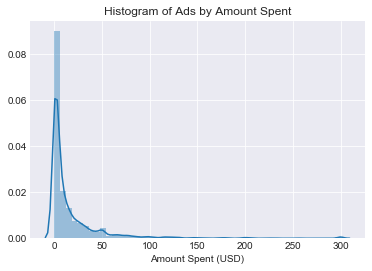

In [12]:
# Drop rows where the Amount spent is 0
travelponydf = travelponydf[travelponydf['Amount Spent (USD)'] !=0]# Histogram of Amount Spent
# Plot the histogram
seab.set_style('darkgrid')
seab.distplot(travelponydf['Amount Spent (USD)']).set_title('Histogram of Ads by Amount Spent')

#### Forming the full multi-variable regression model with statsmodels.api.

In [14]:
# Independent Variables (without campaign names)
X = travelponydf[['Campaign Numbers', 'Reach', 'Frequency', 'Impressions', 'Clicks',
                  'Unique Clicks', 'Page Likes', 'Page Engagement', 'Post Engagement',
                  'Post Likes', 'Post Comments', 'Post Shares', 'Photo Views',
                  'Website Clicks']]
# Dependent variable
y = travelponydf['Amount Spent (USD)']

# Ordinary Least Squares Regression
model = stat.OLS(y, X).fit()
clickpredict = model.predict(X)
# Display the output
model.summary()

# With the constant
X = stat.add_constant(X)
model2 = stat.OLS(y, X).fit()
clickpredict2 = model2.predict(X)
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1745.
Date:                Sat, 13 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:11:07   Log-Likelihood:                -6590.6
No. Observations:                1802   AIC:                         1.321e+04
Df Residuals:                    1788   BIC:                         1.329e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -8.4271      1.536  

#### As one can see, this regression explains quite a bit of the variance in cost with an R-squared of 0.92. The strongest predictors of cost in this regression are page likes, and page and post engagement. However, as the warnings indicate there is surely a large amount of multicollinearity within the model particularly because clicks and impressions are probably correlated as well as clicks, unique clicks, and the engagement characteristics. This is a symptom from the type of data we are using and further research would be required to accurately predict cost.